In [80]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df = pd.read_excel("TestData.xlsx")

xdata = np.array(df['TIME'])
ydata = np.array(df['yData'])


In [81]:
def linear_fit(xdata,ydata):
    
    X = np.vstack((xdata, np.ones(len(xdata)))).T
    Y = ydata.T
    m , c = np.matmul(np.matmul( np.linalg.inv(np.matmul(X.T , X)) , X.T ) , Y)
    
    return m,c

In [82]:
m , c = linear_fit(xdata, ydata)

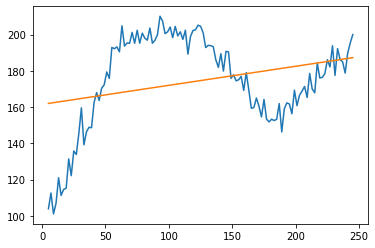

In [83]:
plt.plot(xdata,ydata)
plt.plot(xdata , m * xdata + c)
plt.show()

In [96]:
def piecewise_lin_fit(xdata, ydata, n_segments, b=0):
    n_points = len(xdata)
    
    if b==0:
        b = np.zeros(n_segments + 1)
    
    for i in range(0, len(b)):
        b[i] = xdata[0] + i * (xdata[-1] - xdata[0]) / n_segments
        # guess value
    
    A = np.zeros([n_points, len(b)])
    for j in range(0, len(A[0,:])):
        for i in range(0, len(A[:,0])):
            if j == 0:
                A[i,j] = 1
            elif j == 1:
                A[i,j] = xdata[i] - b[0]
            else:
                if xdata[i] > b[j - 1]:
                    A[i,j] = xdata[i] - b[j - 1]
                    
    beta = np.matmul(np.matmul( np.linalg.inv(np.matmul(A.T , A)) , A.T ) , ydata.T)
    
    return b, beta

In [99]:
b,beta = piecewise_lin_fit(xdata, ydata, 4, 0)
print(b,beta)

[  5.  65. 125. 185. 245.] [100.0156439    1.66524704  -1.66099268  -0.81572889   1.54753162]


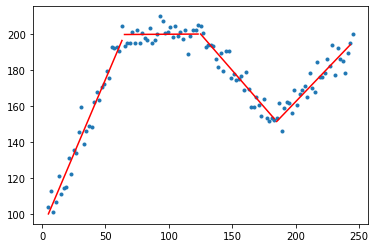

In [101]:
plt.plot(xdata,ydata, '.')
for i in range(0,len(b)-1):
    xtoplot = xdata[xdata<b[i+1]]
    xtoplot = xtoplot[xtoplot>=b[i]]
    ytoplot = beta[0] * np.ones(len(xtoplot))
    for j in range(0,i+1):
        ytoplot = ytoplot + beta[j+1] * (xtoplot - b[j])
    
    plt.plot(xtoplot,ytoplot,color='red')
    
plt.show()